# Linear Regression



## Imports

In [1]:
#Importing the necessary libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Fetching the Data

We'll work with the Ecommerce Customers csv file from a company. It has Customer info, such as Email, Address, and their color Avatar. It also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv('Ecommerce Customers') #assigning the customer data from the csv file to a variable called customers

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info() #getting info on the data within the csv file - no null entries found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

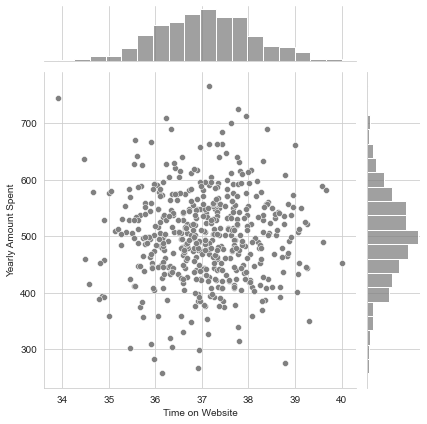

In [6]:
sb.set_style("whitegrid")
sb.jointplot(data=customers, x=customers['Time on Website'], y=customers['Yearly Amount Spent'], color="gray")

- No clear trend is observed between Time on Website and Yearly Amount Spent, however, data points are more concentrated towards the center. 

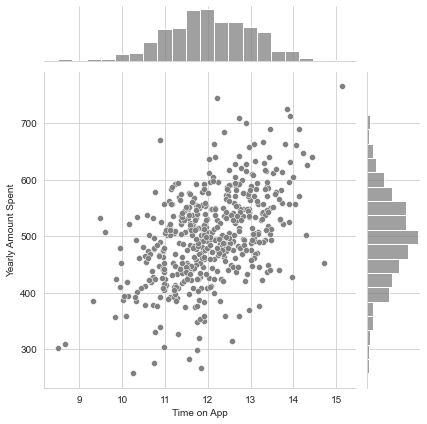

In [47]:
sb.jointplot(data=customers, y='Yearly Amount Spent', x='Time on App', color="gray")

- A weak positive trend between Time on App and Yearly Amount Spent can be observed. This could result in a larger weight for Time on App in the regression model. 

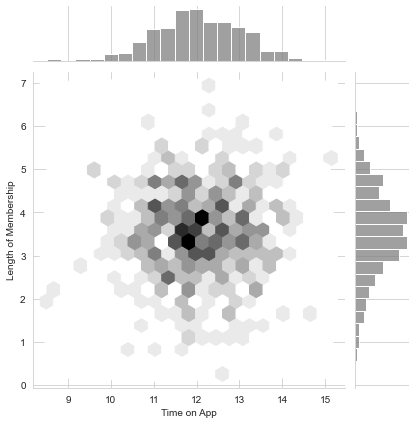

In [8]:
sb.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex', color='gray')

- No clear trend is observed between Time on app and Length of Membership, however, data points are more concentrated towards the center. 

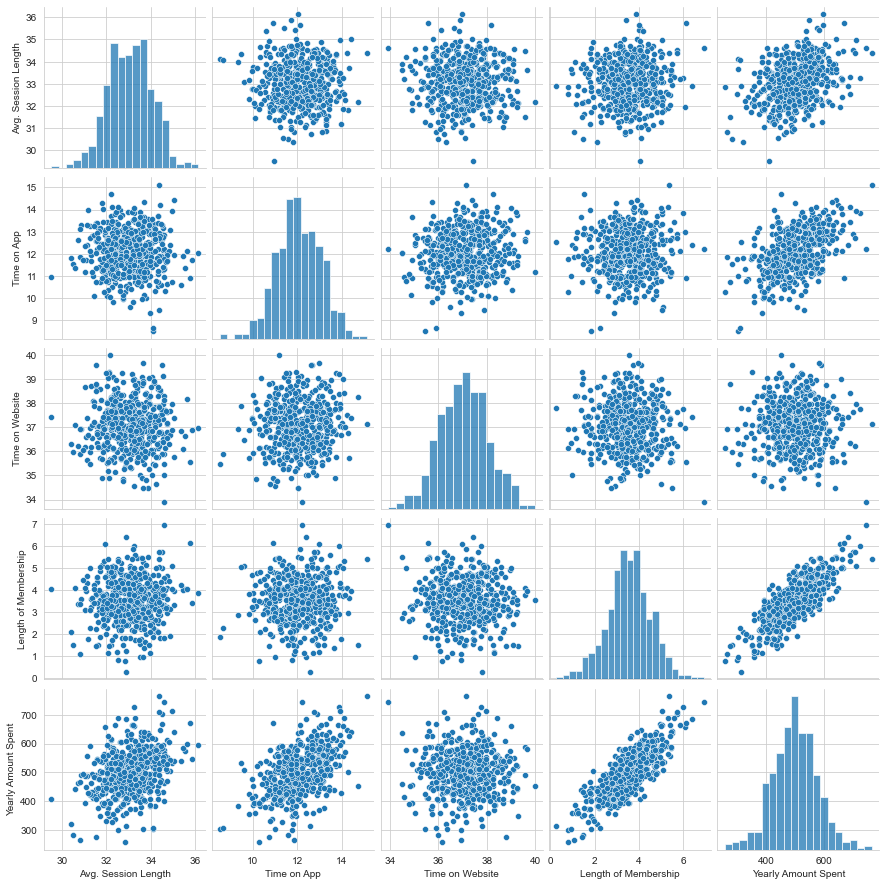

In [9]:
sb.pairplot(customers)

- Length of Membership looks like it is the most correlated feature with Yearly Amount Spent.

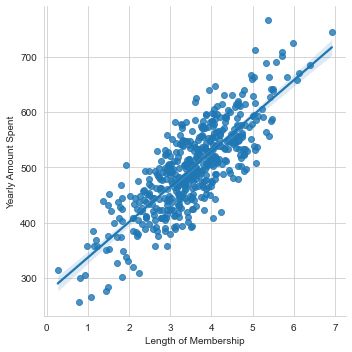

In [10]:
sb.lmplot(data=customers, y='Yearly Amount Spent', x='Length of Membership')

# Training Linear Regression, Support Vector, and Decision Tree regression models
- The X variable (input) will be Avg. Session Length, Time on App, Time on Website, and Length of Membership. Based on our observations from the pairplot, Length of Membership will likely have the largest effect on the Yearly Amount Spent which is the Y variable (output).

In [11]:
X=customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y=customers['Yearly Amount Spent']

- The data is split with a test size of 0.3. This means that 70% of the data will be used to train the three models. 

- A random_state value of 101 is used arbitrarily to ensure that the data is split in the same order by the random number generator every time the code runs.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression

- Scaler is used to normalize the data as a preprocessing step before the data is used for training

In [93]:
lm = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

- Fitting the model to the training data

In [96]:
lm.fit(X_train_scaled, Y_train)

LinearRegression()

The coefficients / weights of the linear regression model:

## Support Vector Regression Model
- Standard Scaler is used here for preprocessing

In [98]:
from sklearn import svm
from sklearn.pipeline import make_pipeline

svr = make_pipeline(StandardScaler(), svm.SVR(C=1.0, epsilon=0.1, kernel='linear')) 

'''a linear kernel is used as this provides the best results. 
The relationship observed at the start of the project also looked linear, 
indicating that a linear kernel would be most appropriate'''

svr.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

## Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
#Scaled data is not required for decision trees as they are not sensitive to the variance in the data

DecisionTreeRegressor()

# Predicting Test Data

In [100]:
lmPredictions = lm.predict(X_test_scaled)
svrPredictions = svr.predict(X_test)
dtrPredictions = dtr.predict(X_test)

- scatterplots of predicted values against the test values for each model can be found below
- the linear and support vector models appear to be far more accurate in their predictions than the decision tree model

Text(0.5, 1.0, 'Linear Regression')

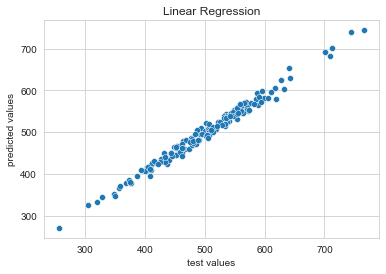

In [107]:
sb.scatterplot(x=Y_test, y=lmPredictions)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Support Vector Regression')

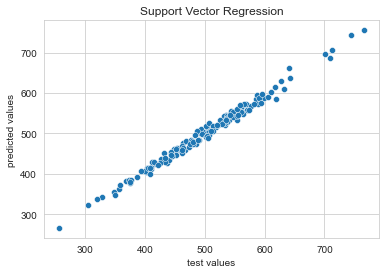

In [110]:
sb.scatterplot(x=Y_test, y=svrPredictions)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.title('Support Vector Regression')

Text(0.5, 1.0, 'Decision Tree Regression')

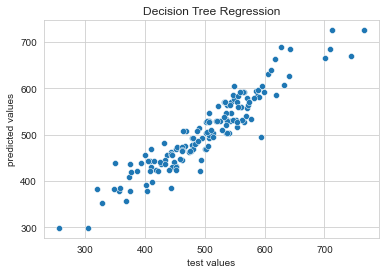

In [109]:
sb.scatterplot(x=Y_test, y=dtrPredictions)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.title('Decision Tree Regression')

## Evaluating the Models

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

- Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error

In [104]:
from sklearn import metrics

def error_metrics(test, p, title): #defining a function to calculate the error metrics given test data and predictions
    print(' ' + title + '\n')
    print('MAE:', metrics.mean_absolute_error(test, p))
    print('MSE:', metrics.mean_squared_error(test, p))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(test, p)), "\n")

In [112]:
error_metrics(Y_test, lmPredictions, 'Linear Regression')
error_metrics(Y_test, svrPredictions, 'Support Vector Machine Regression')
error_metrics(Y_test, dtrPredictions, 'Decision Tree Regression')


 Linear Regression

MAE: 9.369764701026467
MSE: 133.27454165600952
RMSE: 11.544459348796266 

 Support Vector Machine Regression

MAE: 7.97778799191045
MSE: 95.6758830949602
RMSE: 9.781404965287972 

 Decision Tree Regression

MAE: 23.18899837618958
MSE: 871.7435227966466
RMSE: 29.525303094069105 



- The support vector model had the lowest error of all three models with a mean absolute error (MAE) of 7.98. 
- Linear Regression was close too with a mean absolute error (MAE) of 9.37

- Mean Squared Error (MSE) is a better evaluation metric for regression model as it punishes deviations from the test values more. Based on this, we can conclude that the support vector model performed the best as it has a MSE value that is substantially lower than the linear regression and decision tree regression models. 

- The decision tree model was the worst performing model with an extremely high mean squared error (MSE) value of 871. 

## Residuals
- histplots of the residuals for each model can be found below
- consistent with our previous findings, the linear regression model and support vector model performed better than the decision tree model. This is evident when looking at the range of the residuals on the x-axis, with the support vector model having the smallest range.

Text(0.5, 1.0, 'Linear Regression')

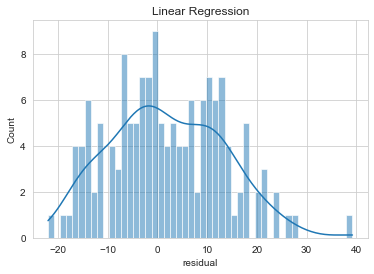

In [114]:
sb.histplot((Y_test-lmPredictions), bins=50, kde=True);
plt.xlabel('residual')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Support Vector Regression')

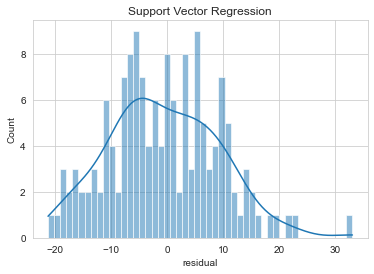

In [116]:
sb.histplot((Y_test-svrPredictions), bins=50, kde=True);
plt.xlabel('residual')
plt.title('Support Vector Regression')

Text(0.5, 1.0, 'Decision Tree Regression')

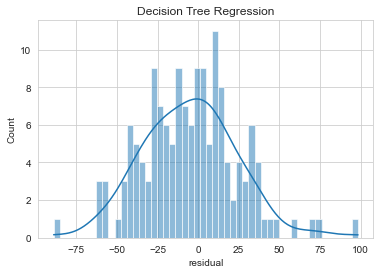

In [117]:
sb.histplot((Y_test-dtrPredictions), bins=50, kde=True);
plt.xlabel('residual')
plt.title('Decision Tree Regression')

## Conclusion
- The linear regression and support vector regression models both proved to be fairly accurate at predicting the yearly amount spent given Avg. Session Length, Time on App, Time on Website, and Length of Membership.

- By looking at the linear model's coefficients, we can determine if the company should focus more on their mobile app or their website.

In [28]:
lmCoeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
lmCoeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Looking at the coefficients above, time on app has a much larger effect on the yearly amount spent (38.59 vs 0.19). Therefore, it would be better for the company to focus more on increasing the time spent on their app. 